### CUSTOMER CHURN 

In [87]:
# importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
%matplotlib inline

In [ ]:
# importing data

In [5]:
df=pd.read_csv('customer_churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.shape

(7043, 21)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# How does gender realte to churn
df.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

In [12]:
genderwise_churn=df[df['Churn']=='Yes']

In [13]:
genderwise_churn.groupby('gender')['Churn'].count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

Text(0, 0.5, 'Total churn')

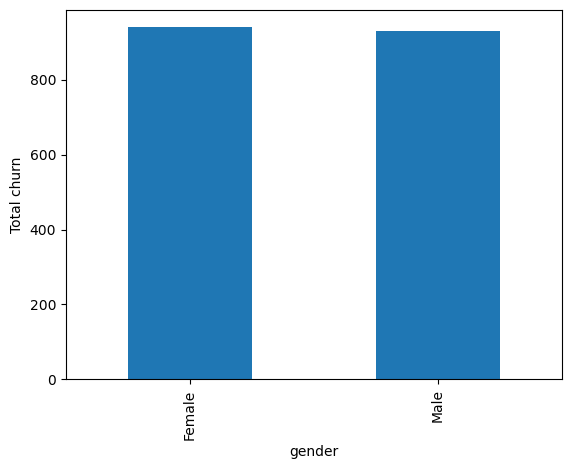

In [14]:
genderwise_churn.groupby('gender')['Churn'].count().plot(kind='bar')
plt.ylabel('Total churn')

THIS CHART SHOWS BOTH MALE AND FEMALE GROUPS HAVE SIMILAR NUMBER OF CUSTOMERS WHO DID NOT CHURN. THIS SUGGESTS THAT GENDER IS NOT A STRONG PREDICTOR OF CUSTOMER CHURN IN THE DATASET.

In [15]:
#Do customers with dependents churn less than those without?
df.groupby(['Dependents','Churn'])['Churn'].count()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

In [16]:
dependents_churn=df[df['Churn']=='Yes']

In [17]:
dependents_churn.groupby('Dependents')['Churn'].count()

Dependents
No     1543
Yes     326
Name: Churn, dtype: int64

Text(0, 0.5, 'Number of customers who churn')

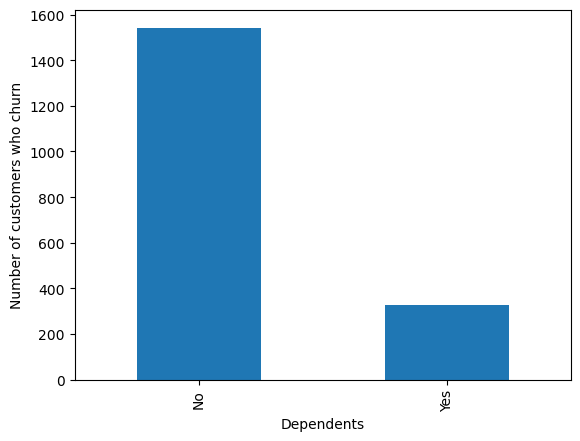

In [18]:
dependents_churn.groupby('Dependents')['Churn'].count().plot(kind='bar')
plt.ylabel('Number of customers who churn')

CUSTOMER WITHOUT DEPENDENTS SHOW A HIGHER CHURN RATE COMPARED CUSTOMER WITH DEPENDENTS. WHILE THE MAJORITY OF CUSTOMERS WHO CHURNED DO NOT HAVE DEPENDENTS.

In [19]:
# What is the churn rate for customers with month-to-month contracts vs. 1-year or 2-year contracts

In [20]:
df1=df[df['Churn']=='Yes']

In [21]:
df1['Contract'].value_counts()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

<Axes: xlabel='Contract'>

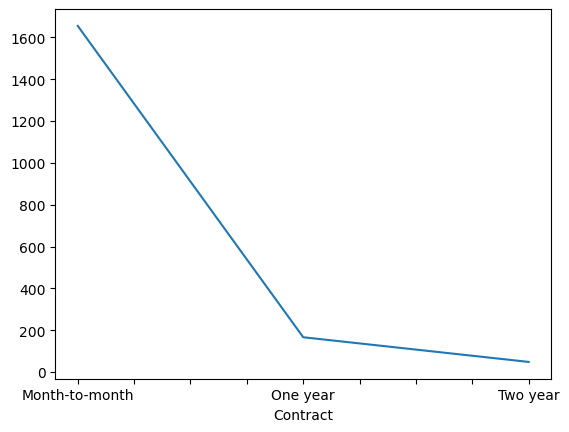

In [22]:
df1['Contract'].value_counts().plot()

CUSTUMERS ON A MONTH-TO-MONTH CONTRACT HAVE THE HIGHEST CHURN RATE, WHICH THEN DECREASES SIGNIFICANTLY FOR CUSTOMERS ON A TWO YEAR AND ONE YEAR CONTRACT. THIS SUGGESTS THAT LONGER TERM CONTRACTS ARE A GOOD WAY TO REDUCE CHURN.

In [23]:
# churn rate of people with month to month contract

churn_rate_month_to_month=df[(df['Churn']=='Yes') & (df['Contract']=='Month-to-month')].shape[0]

In [24]:
total_customers_month_to_month=df[df['Contract']=='Month-to-month'].shape[0]

In [25]:
(churn_rate_month_to_month/total_customers_month_to_month)*100

42.70967741935484

In [26]:
# churn rate of people with 1 or 2 year contract

a=df[(df['Contract']=='One year')|(df['Contract']=='Two year')].shape[0]


In [27]:
b=df[((df['Contract']=='One year') | (df['Contract']=='Two year')) & (df['Churn']=='Yes')].shape[0]

In [28]:
(b/a)*100

6.755050505050505

In [29]:
# Does payment method affect Churn?
# Do customers with automatic payments churn less often

In [30]:
paymentwise_churn=df[df['Churn']=='Yes']

In [31]:
paymentwise_churn.groupby('PaymentMethod')['Churn'].count()

PaymentMethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: Churn, dtype: int64

<Axes: xlabel='PaymentMethod'>

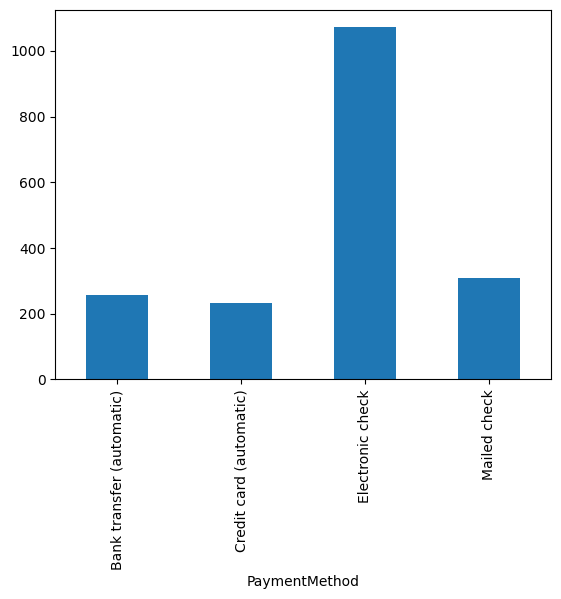

In [32]:
paymentwise_churn.groupby('PaymentMethod')['Churn'].count().plot(kind='bar')

CUSTOMER WHO USE 'ELECTRONIC CHECK' AS THEIR PAYMENT METHOD HAVE SIGNIFICANTLY HIGHER CHURN RATE COMPARED TO THOSE USING OTHER METHODS LIKE 'BANK TRANSFER(AUTOMATIC)' 'CREDIT CARD' OR 'MAILED CHECK'.

In [33]:
# Do customers with multiple lines churn more than others?

In [34]:
multiplLinewise_churn=df[df['Churn']=='Yes']

In [35]:
multiplLinewise_churn.groupby('MultipleLines')['Churn'].count()

MultipleLines
No                  849
No phone service    170
Yes                 850
Name: Churn, dtype: int64

<Axes: xlabel='MultipleLines'>

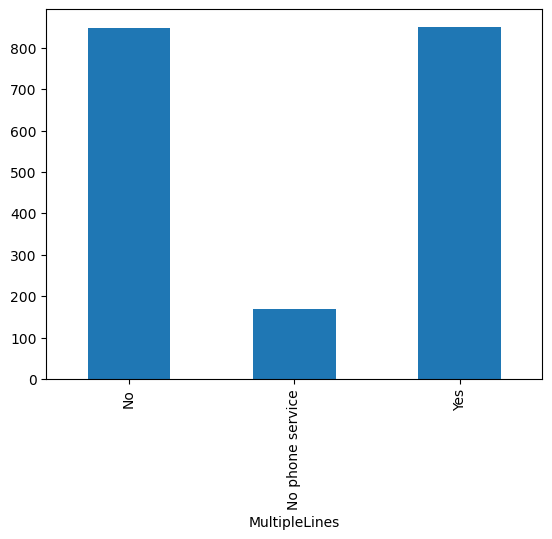

In [36]:
multiplLinewise_churn.groupby('MultipleLines')['Churn'].count().plot(kind='bar')

A SIGNIFICANTLY HIGHER NUMBER OF CHURNED CUSTOMERS EITHER HAVE 'MULTIPLE LINES' OR 'NO MULTIPLE LINE' 

In [37]:
# Which internet service type has highest churn?

In [38]:
InternetServiceWise_churn=df[df['Churn']=='Yes']

In [39]:
InternetServiceWise_churn.groupby('InternetService')['Churn'].count()

InternetService
DSL             459
Fiber optic    1297
No              113
Name: Churn, dtype: int64

Text(0, 0.5, 'Number of customer who churn')

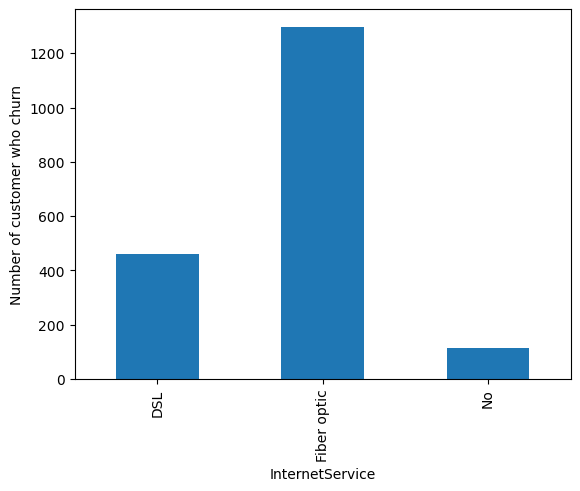

In [40]:
InternetServiceWise_churn.groupby('InternetService')['Churn'].count().plot(kind='bar')
plt.ylabel('Number of customer who churn')

In [41]:
# Is monthly charge higher for customr who churn compared to those who stay?

In [42]:
df.groupby('Churn')['MonthlyCharges'].agg(['mean','count'])

,mean,count
Churn,,
No,61.265124,5174
Yes,74.441332,1869


YES, MONTHLY CHARGE IS HIGHER FOR CUSTOMER WHO CHURN COMPARED TO THOSE WHO STAY

In [43]:
#Overall churn rate

In [44]:
churn_yes=df[df['Churn']=='Yes'].shape[0]

In [45]:
total_churn=df['Churn'].shape[0]

In [46]:
total_churn_rate=(churn_yes/total_churn)*100

In [47]:
total_churn_rate

26.536987079369588

In [48]:
#Is churn more common among new customers or old customers?


In [49]:
df[df['tenure']>12]['Churn'].value_counts()

Churn
No     4025
Yes     832
Name: count, dtype: int64

In [50]:
df[df['tenure']<=12]['Churn'].value_counts()

Churn
No     1149
Yes    1037
Name: count, dtype: int64

Text(0.5, 1.0, 'New customers')

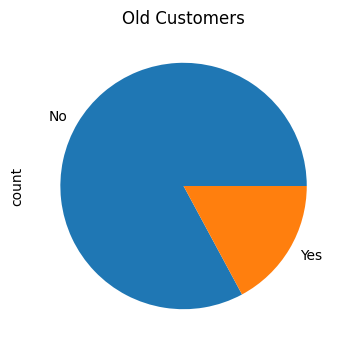

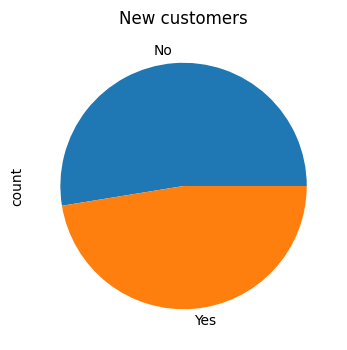

In [51]:
plt.figure(figsize=(6,4))
df[df['tenure']>12]['Churn'].value_counts().plot(kind='pie')
plt.title('Old Customers')

plt.figure(figsize=(6,4))
df[df['tenure']<=12]['Churn'].value_counts().plot(kind='pie')
plt.title('New customers')


CHURN IS COMMON AMONG NEW CUSTOMERS

In [52]:
# Do customers with paperless billing churn more than those with mailed bills?

In [53]:
PaperlessBillingwise_churn=df[df['Churn']=='Yes']

In [54]:
PaperlessBillingwise_churn.groupby('PaperlessBilling')['Churn'].count()

PaperlessBilling
No      469
Yes    1400
Name: Churn, dtype: int64

Text(0, 0.5, 'Number of customers who churn')

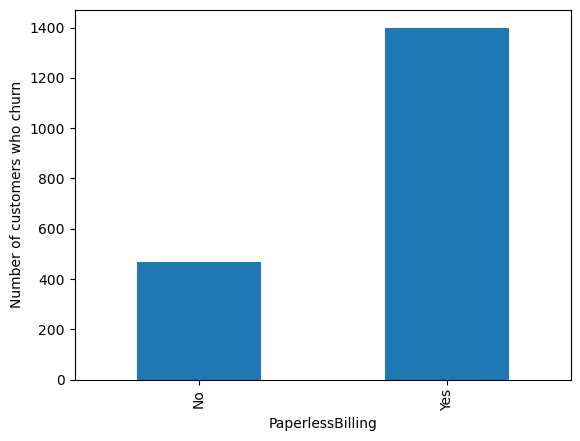

In [55]:
PaperlessBillingwise_churn.groupby('PaperlessBilling')['Churn'].count().plot(kind='bar')
plt.ylabel('Number of customers who churn')

CUSTOMERS WHO USE 'PAPERLESS BILLING' CHURN SIGNIFICANTLY MORE THAN THOSE WHO DO NOT. 

### identifying null values

In [56]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Outliers

In [57]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [59]:
Q1=df['TotalCharges'].quantile(0.25)

In [60]:
Q3=df['TotalCharges'].quantile(0.75)

In [61]:
IQR=Q3-Q1

In [62]:
IQR

np.float64(3393.2875000000004)

In [63]:
upper=Q3+(1.5*IQR)

In [64]:
upper

np.float64(8884.66875)

In [65]:
lower=Q1-(1.5*IQR)

In [66]:
lower

np.float64(-4688.481250000001)

In [67]:
df[(df['TotalCharges']>upper) | (df['TotalCharges']<lower)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### There are no outliers and missing values in the data.

In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Feature selction

In [77]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [79]:
for c in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',             
'PaperlessBilling',     
'PaymentMethod']:
    df[c]=le.fit_transform(df[c])


In [80]:
x=df.drop(columns=['Churn','customerID','TotalCharges','MonthlyCharges','tenure','SeniorCitizen'])

In [81]:
y=df.iloc[:,-1]

In [82]:
chi=chi2(x,y)

In [83]:
chi

(array([2.58698618e-01, 8.24120826e+01, 1.33036443e+02, 9.72606249e-02,
        9.74692078e+00, 9.82102823e+00, 5.51611529e+02, 2.30086520e+02,
        1.91303140e+02, 5.23303866e+02, 7.49020319e+00, 8.23539949e+00,
        1.11578017e+03, 1.05680863e+02, 5.84922505e+01]),
 array([6.11015635e-001, 1.10476396e-019, 8.87672856e-031, 7.55142091e-001,
        1.79623344e-003, 1.72527862e-003, 5.61588231e-122, 5.70786894e-052,
        1.65153873e-043, 8.08623624e-116, 6.20355560e-003, 4.10811292e-003,
        1.22794132e-244, 8.66198711e-025, 2.04093269e-014]))

In [84]:
a=pd.Series(chi[0],index=x.columns)

<Axes: >

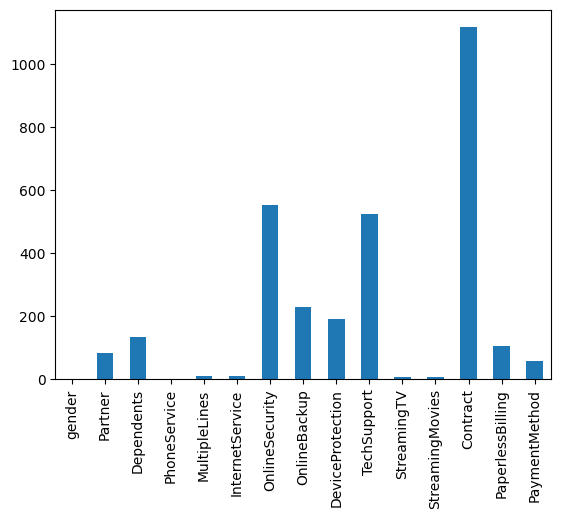

In [85]:
a.plot(kind='bar')

In [86]:
a

gender                 0.258699
Partner               82.412083
Dependents           133.036443
PhoneService           0.097261
MultipleLines          9.746921
InternetService        9.821028
OnlineSecurity       551.611529
OnlineBackup         230.086520
DeviceProtection     191.303140
TechSupport          523.303866
StreamingTV            7.490203
StreamingMovies        8.235399
Contract            1115.780167
PaperlessBilling     105.680863
PaymentMethod         58.492250
dtype: float64

### CONCLUSION: CUSTOMER CHURN IS NOT STRONGLY RELATED TO DEMOGRAPHIC FACTORS LIKE GENDER, BUT IT IS HIGHLY CONCENTRATED AROUND SPECIFIC SERVICE FEATURES AND BILLING PRACTICES.
### THE CUSTOMER MOST LIKELY TO CHURN IS ONE WHO:
    1) IS ON A MONTH TO MONTH CONTRACT
    2) USES FIBER OPTIC INTERNET SERVICE 
    3) PAYS ELECTRONIC CHECK
    4) DOES NOT HAVE DEPENDENTS

### SOLUTIONS TO REDUCE CUSTOMER CHURN:
    1) OFFER LONG TERM CONTRACT INCENTIVES: INTRODUCE ATTRACTIVE DISCOUNTS, FREE MONTHS OF SERVICE, OR PREMIUM UPGRADES FOR CUSTOMERS WHO AGREE TO SWITCH FROM MONTH-TO-MONTH PLA TO A 1-YEAR OR 2-YEAR CONTRACT
    2) THE HIGH CHURN SUGGESTS POTENTIAL PROBLEMS WITH THE FIBER OPTIC OFFERING. A DEEP DIVE QUALITY CHECK AND CUSTOMER FEEDBACK ANALYSIS FOR THIS SERVICE IS CRITICAL
    3) PROVIDE PERSONALISED OFFERS 